In [1]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.colors
import matplotlib.colors as c
import pandas as pd
import matplotlib.colors as mcolors
from skimage import color
from skimage import io

In [3]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [4]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
CSS_ELLY = ['white','maroon','red','purple','fuchsia','green','lime','olive','yellow','navy','blue','teal','aqua']
CSS_ELENA = {}
for x in CSS_ELLY:
    CSS_ELENA[x] = mcolors.CSS4_COLORS[x]

In [6]:

CSS_RGB_COLORS = [mcolors.hex2color(c) for c in CSS_ELENA]

CSS_LAB_COLORS = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]

BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

In [7]:
def get_centroids_base_colors(image, number_of_colors=10, show_chart=True):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    #rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    lab_colors = [convert_rgb2lab(p) for p in ordered_colors]
    
    centroids_df = pd.DataFrame()
    
    for i in range(number_of_colors):
        c_dict = {}
        print(ordered_colors[i])
        rgb_c = ordered_colors[i]
        c_dict['centroid'] = rgb_c
        
        nearest_base_color = 0
        lab_c = lab_colors[i]
        
        min_distance = deltaE_cie76(lab_c, CSS_LAB_COLORS[0])
        nearest_base_color_index = 0
        
        i = 1
        for c in CSS_LAB_COLORS[1:]:
            tmp_distance = deltaE_cie76(lab_c, c)
            if (tmp_distance < min_distance):
                min_distance = tmp_distance
                nearest_base_color = i
            i += 1
                
        c_dict['nearest_base_color'] = CSS_RGB_COLORS[nearest_base_color]
        
        centroids_df = centroids_df.append(c_dict, ignore_index=True)
        nearest_base_colors_rgbs = centroids_df['nearest_base_color']
        nearest_base_colors_hex = [mcolors.rgb2hex(c) for c in nearest_base_colors_rgbs] 
    
    if (show_chart):
        plt.figure(figsize = (16, 6))
        fig_dims = (1, 2)
        ax_1 = plt.subplot2grid(fig_dims, (0, 0))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        ax_1 = plt.subplot2grid(fig_dims, (0, 1))
        plt.pie(counts.values(), labels = nearest_base_colors_hex, colors = nearest_base_colors_rgbs)
            
    return centroids_df

In [10]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\Pinocchio\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0005.png_resized.png
[0.03565954 0.01687714 0.01152472]
[0.06613096 0.05670799 0.06946574]
[0.13122665 0.1074355  0.12422935]
[0.20229817 0.17834202 0.17601534]
[0.12037545 0.05238047 0.03295986]
[0.29747452 0.14048861 0.0546011 ]
[0.21068114 0.29844794 0.31607748]
[0.44699526 0.28142119 0.14738866]
[0.56597057 0.41270935 0.26493806]
[0.63153476 0.69661838 0.58128731]
output_0007.png_resized.png
[0.62542694 0.63049044 0.50076226]
[0.56407228 0.5267293  0.38164176]
[0.43964866 0.40664993 0.30354269]
[0.34999848 0.24219361 0.15007642]
[0.14943722 0.06752776 0.04173605]
[0.25876062 0.14695376 0.09806679]
[0.09899473 0.15589661 0.23650397]
[0.04566252 0.06857944 0.1389497 ]
[0.2783045  0.37607534 0.53712153]
[0.5089616  0.36210858 0.19572229]
output_0010.png_resized.png
[0.10307337 0.06578383 0.07074655]
[0.02681016 0.02652974 0.03551376]
[0.16325297 0.11324909 0.10442741]
[0.23429388 0.15761305 0.11051481]
[0.22492705 0.21386156 0.21705876]
[0.32622117 0.22378375 0.1412317 ]
[0.398

output_0075.png_resized.png
[0.42159139 0.34533914 0.25595499]
[0.35657438 0.26900098 0.19269796]
[0.29210783 0.20676041 0.16058765]
[0.23193852 0.15777625 0.14223913]
[0.4957573  0.49487756 0.42896641]
[0.11866083 0.07949486 0.11194429]
[0.53530548 0.65949741 0.70899819]
[0.64167921 0.66308947 0.5423565 ]
[0.57928685 0.39064445 0.15038725]
[0.84184011 0.73927499 0.29600595]
output_0077.png_resized.png
[0.57144227 0.40207393 0.28408467]
[0.42018779 0.30290703 0.22192966]
[0.30480667 0.16537082 0.13266944]
[0.50968298 0.1769886  0.13654183]
[0.30364272 0.4117256  0.43034823]
[0.70005503 0.51059339 0.27553268]
[0.53242239 0.60671193 0.33043216]
[0.66865474 0.62632414 0.50155345]
[0.20633835 0.28712515 0.09169724]
[0.0831908  0.09408406 0.12462804]
output_0080.png_resized.png
[0.30282869 0.21050907 0.14478732]
[0.23381693 0.15226648 0.11557282]
[0.16447235 0.10726838 0.08683564]
[0.07247116 0.04963808 0.03322123]
[0.38192566 0.25230359 0.15642213]
[0.45468855 0.36124444 0.2992755 ]
[0.677

[0.02054393 0.01330479 0.01516125]
[0.07236135 0.04528899 0.03686006]
[0.13104837 0.08604825 0.05829948]
[0.20254559 0.13192154 0.07403694]
[0.2916284  0.21592865 0.12688347]
[0.16817415 0.18311362 0.17621113]
[0.38417637 0.31781326 0.19838718]
[0.51351883 0.4244368  0.23330434]
[0.64206628 0.53001861 0.27985756]
[0.79168135 0.65036363 0.29958789]
output_0148.png_resized.png
[0.33025608 0.36387766 0.39506327]
[0.42728951 0.5056396  0.52671841]
[0.3109891  0.17606124 0.14031534]
[0.209655   0.12055098 0.11125294]
[0.04067978 0.17648016 0.31480505]
[0.10507765 0.29241742 0.43932455]
[0.04501816 0.05435067 0.05861072]
[0.50978243 0.60422583 0.62612692]
[0.69143203 0.76892076 0.8582707 ]
[0.25674774 0.4806747  0.56450917]
output_0151.png_resized.png
[0.29785189 0.34605329 0.43607239]
[0.21703661 0.25710924 0.35355041]
[0.05682859 0.09516725 0.18408342]
[0.03693308 0.0482532  0.08145285]
[0.14299333 0.16668966 0.25405195]
[0.47449119 0.507976   0.60576337]
[0.56509485 0.59396557 0.69965732]

C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [11]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

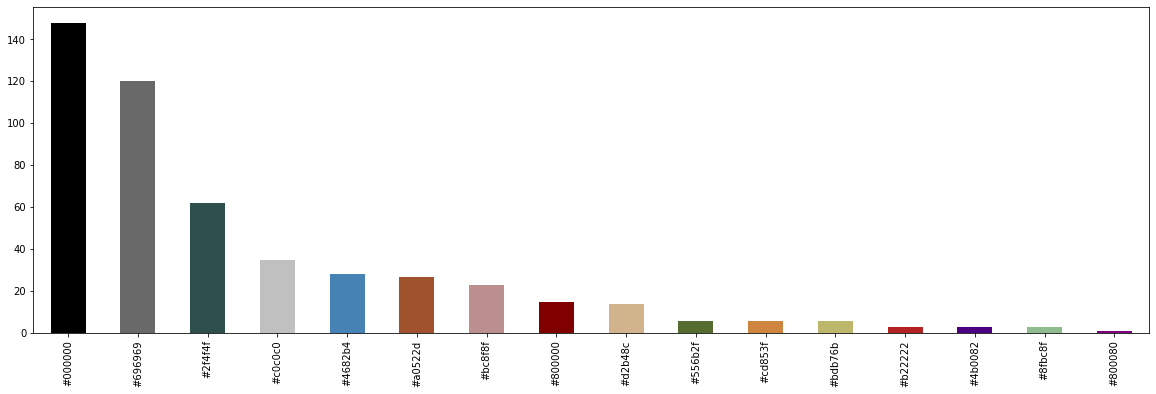

In [12]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()

In [8]:
#up 45 frames senza nero e grigio
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\2010-Up-resized1\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0004.png_resized - Copia.png
[0.00401169 0.00400413 0.00404657]
[0.04970803 0.04962207 0.0496808 ]
[0.12580479 0.12576859 0.12580503]
[0.23453093 0.23449036 0.23456117]
[0.34714952 0.34712418 0.34715528]
[0.43838032 0.43837376 0.43837814]
[0.53644485 0.53643501 0.53644288]
[0.63667713 0.63667713 0.63667713]
[0.73538457 0.73538457 0.73538457]
[0.82227321 0.82223701 0.82208312]
output_0006.png_resized - Copia.png
[0.05648505 0.05370361 0.06941702]
[0.11043234 0.10695738 0.13028704]
[0.15028023 0.20063316 0.27864021]
[0.3135017  0.35806947 0.42997051]
[0.44118422 0.47196347 0.56194903]
[0.54004883 0.61954507 0.71032067]
[0.77624332 0.86855169 0.90246881]
[0.19559522 0.16165541 0.16092276]
[0.01139518 0.0111854  0.0150531 ]
[0.28724819 0.2795697  0.28794218]
output_0008.png_resized - Copia.png
[0.15751922 0.10962818 0.07977722]
[0.08548572 0.05477306 0.03430152]
[0.1908624  0.16573882 0.19123534]
[0.33511925 0.21252656 0.08723716]
[0.50721588 0.38102353 0.24938091]
[0.46494596 0.298

output_0072.png_resized - Copia.png
[0.73933036 0.83441436 0.91997766]
[0.73243092 0.75227994 0.78344725]
[0.64996131 0.63618636 0.65814913]
[0.47688537 0.48591873 0.51788484]
[0.8106249  0.83952657 0.85819185]
[0.6342077  0.48477548 0.43519741]
[0.41903292 0.37362716 0.37045107]
[0.34190368 0.28201544 0.25754844]
[0.21038581 0.19204737 0.1866027 ]
[0.1094718  0.11465747 0.1281834 ]
output_0073.png_resized - Copia.png
[0.55840699 0.59721215 0.65922987]
[0.61314642 0.75449134 0.91253175]
[0.46014419 0.49377716 0.52375927]
[0.3632033  0.30584264 0.26443032]
[0.47338761 0.40001555 0.34579082]
[0.74433763 0.82243621 0.91104139]
[0.71464603 0.70059683 0.72807336]
[0.66888759 0.50735401 0.36451042]
[0.23758168 0.19564327 0.17321094]
[0.10924511 0.10104156 0.11698154]
output_0075.png_resized - Copia.png
[0.67301338 0.79434928 0.89955545]
[0.60198214 0.59486581 0.6377369 ]
[0.19571583 0.49993899 0.58235208]
[0.11434966 0.09486899 0.12900108]
[0.49627377 0.43921395 0.41816991]
[0.34923039 0.272

[0.13917158 0.09908801 0.08169374]
[0.19647053 0.14470766 0.12174633]
[0.31822422 0.2688168  0.24442372]
[0.26724485 0.19994369 0.17322922]
[0.47437152 0.41108154 0.36000768]
[0.07491126 0.05268926 0.04481024]
[0.40725751 0.34483339 0.29737975]
[0.55928275 0.49518906 0.45831774]
[0.70162136 0.61237495 0.58723275]
[0.83267355 0.72610604 0.69986533]
output_0128.png_resized.png
[0.85535185 0.80908667 0.75306717]
[0.83852954 0.76619345 0.73431531]
[0.8154413  0.73076195 0.68635004]
[0.78282056 0.65705818 0.59771679]
[0.77383938 0.58821599 0.4744931 ]
[0.73329304 0.4944783  0.38576665]
[0.66945679 0.40914836 0.32393876]
[0.58297565 0.34500916 0.28081919]
[0.51102238 0.29616283 0.24660069]
[0.40612239 0.23150875 0.20127833]
output_0130.png_resized.png
[0.81093184 0.65377688 0.57961671]
[0.73045978 0.52000716 0.43082009]
[0.54118881 0.3466952  0.28734761]
[0.44255709 0.27384074 0.22256273]
[0.65679161 0.4122054  0.33087989]
[0.34808161 0.21044487 0.1657757 ]
[0.25653861 0.15811799 0.12293248]

In [9]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

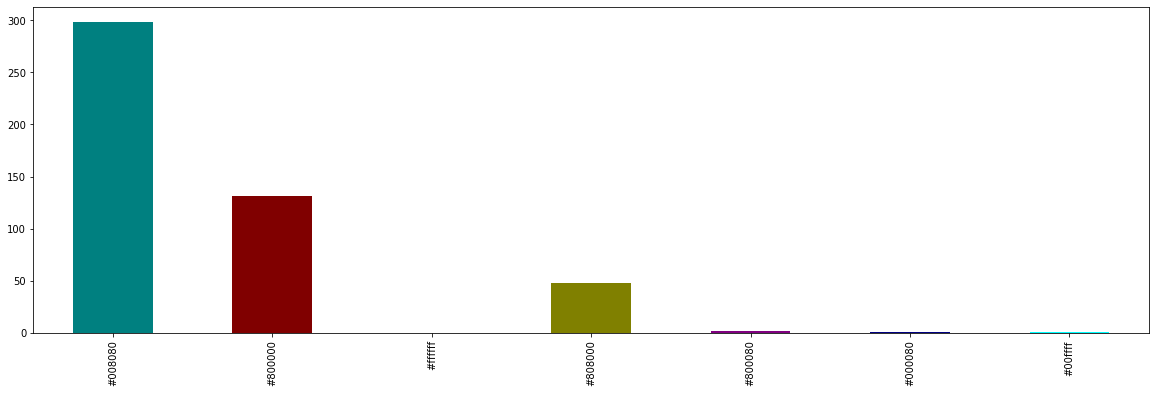

In [10]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()